In [1]:
from Bio.Align import substitution_matrices
blosum62_matrix = substitution_matrices.load("BLOSUM62")

import pandas as pd
import numpy as np
print(np.mean(blosum62_matrix))

-1.2604166666666667


In [2]:
df = pd.read_csv("../data/GB1/fitness.csv")
print(df.columns)
df.fitness = (df.fitness - df.fitness.min())/(df.fitness.max() - df.fitness.min())
top_df = df.sort_values(by="fitness", ascending=False).head(20)
print(df.describe())
print(top_df.describe())
def sim(seq1, seq2):
    return sum([blosum62_matrix[(s1, s2)] for s1, s2 in zip(seq1, seq2)])/4

Index(['Combo', 'fitness'], dtype='object')
             fitness
count  149361.000000
mean        0.009189
std         0.045126
min         0.000000
25%         0.000156
50%         0.000386
75%         0.001026
max         1.000000
         fitness
count  20.000000
mean    0.794922
std     0.074391
min     0.716157
25%     0.739840
50%     0.783813
75%     0.831995
max     1.000000


In [3]:
sims = []
print(top_df.shape)
for seq1 in top_df["Combo"]:
    s = 0
    for seq2 in top_df["Combo"]:
        s += sim(seq1, seq2)
    sims.append(s/top_df.shape[0])

top_df["sim"] = sims

(20, 2)


In [4]:
def scores(sequences):
    return df[df['Combo'].isin(sequences)]

In [5]:
print(scores(['AMHG', 'QPEI', 'GMYW', 'KWNA', 'QDRA']))

  Combo   fitness
0  AMHG  0.000000
1  QPEI  0.000000
2  GMYW  0.000000
3  KWNA  0.000204
4  QDRA  0.000540


In [6]:
print(sim("WWCA", "WWFV"))

5.0


In [18]:
import torch
import glob
from matplotlib import pyplot as plt
protein = 'TrpB'
files = glob.glob(f'../results/10_50_simulation/{protein}/onehot/DNN*indices.pt')
#files = glob.glob(f'../results/*standalone4/{protein}/onehot/AGENT*.pt')
fitness = pd.read_csv(f'../data/{protein}/fitness.csv')
fitness.fitness = (fitness.fitness - fitness.fitness.min())/(fitness.fitness.max() - fitness.fitness.min())
print(len(files))
print(len(torch.load('../results/standalone_GB1_3/cycle_5_indices.pt')))
fitness2 = pd.read_csv(f'../data/{protein}/fitness.csv')
fitness2.fitness = (fitness2.fitness - fitness2.fitness.min())/(fitness2.fitness.max() - fitness2.fitness.min())
print(fitness2[fitness2['Combo'] ==  'VDGV'])
print(f'n combos {fitness2.shape[0]/24**4}')

150
60
       Combo   fitness
136163  VDGV  0.004284
n combos 0.4796278211805556


In [20]:
top05 = fitness.sort_values(by='fitness', ascending=False).head(len(fitness)//200)
top2 = fitness.sort_values(by='fitness', ascending=False).head(len(fitness)//50)
print(f'Top 0.5%: {top05["fitness"].min()}, {top05.shape[0]} samples')
print(f'Top 2%: {top2["fitness"].min()}, {top2.shape[0]} samples')
representation = fitness['Combo'].apply(lambda sq: sq.count('W')/4).sum()/fitness.shape[0]
print(f"Underrepresentation of Trp in top 0.5 %: {representation/(top05['Combo'].apply(lambda sq: sq.count('W')/4).sum()/top05['Combo'].shape[0])}")
print(f"Underrepresentation of Trp in top 2% %: {representation/(top2['Combo'].apply(lambda sq: sq.count('W')/4).sum()/top2['Combo'].shape[0])}")

Top 0.5%: 0.456275836, 795 samples
Top 2%: 0.202988588, 3182 samples
Underrepresentation of Trp in top 0.5 %: 157.53718681070077
Underrepresentation of Trp in top 2% %: 11.676760503881896


../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-GREEDY-[30, 1]_12indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-UCB-[30, 1]_48indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-UCB-[30, 1]_38indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-UCB-[30, 1]_16indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-TS-[30, 1]_24indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-TS-[30, 1]_12indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-UCB-[30, 1]_3indices.pt


../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-TS-[30, 1]_33indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-GREEDY-[30, 1]_3indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-GREEDY-[30, 1]_5indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-TS-[30, 1]_42indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-UCB-[30, 1]_40indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-TS-[30, 1]_5indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-GREEDY-[30, 1]_4indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-TS-[30, 1]_8indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-GREEDY-[30, 1]_24indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-GREEDY-[30, 1]_31indices.pt
../results/10_50_simulation/TrpB/onehot/DNN_ENSEMBLE-DO-0-RBF-UCB-[30, 1]_17indices.pt
../results/10_50_simulation/TrpB/oneh

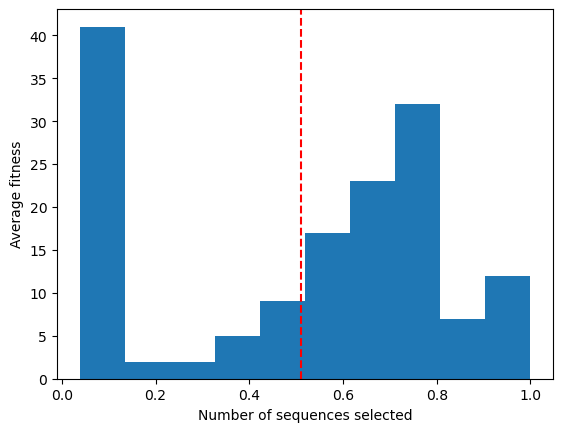

150


In [9]:
n, score = [],[]
for file in files:
    ind = torch.load(file)
    n.append(len(ind))
    score.append(fitness.iloc[ind].fitness.max())
    if len(ind) < 60 or score[-1] < 0.3:
        print(file)
plt.axvline(x=np.mean(score), color='r', linestyle='--')
plt.hist(score)
plt.xlabel('Number of sequences selected')
plt.ylabel('Average fitness')
plt.show()
print(len(files))

In [9]:
inds = torch.load('../results/10_50_blosum/GB1/onehot/DNN_ENSEMBLE-DO-0-RBF-SIMPLEAGENT-[30, 1]_2indices.pt')
sub = df.iloc[inds]
sq = sub['Combo'].tolist()
print(len(list(set(sq))))

60


In [10]:
print(chat_completion.choices[0].message.content)
print(chat_completion.choices[0].message.reasoning_content)

NameError: name 'chat_completion' is not defined

In [4]:
small_AA = ['A', 'G', 'S', 'C', 'T', 'P']
medium_AA = ['V', 'N', 'D', 'H', 'M', 'Q', 'E']
bulky_AA = ['L', 'I', 'K', 'R', 'F', 'Y', 'W']

df = pd.read_csv("../data/TrpB/fitness.csv")
df['top2pc'] = df['fitness'].rank(pct=True) > 0.98
df['top005pc'] = df['fitness'].rank(pct=True) > 0.995
match1 = lambda sq : (sq[0] in small_AA) and (sq[1] in bulky_AA) and (sq[2] in small_AA) and (sq[3] in bulky_AA)
match2 = lambda sq : (sq[0] in bulky_AA) and (sq[1] in small_AA) and (sq[2] in bulky_AA) and (sq[3] in small_AA)
df['match1'] = df['Combo'].apply(match1)
df['match2'] = df['Combo'].apply(match2)

In [7]:
print(df[df.Combo == 'VFVS'])
print(df[df['top005pc'] == True]['fitness'].min())

       Combo   fitness  top2pc  top005pc  match1  match2
137201  VFVS  0.408074    True     False   False   False
0.455585216


In [6]:
n_1 = df['match1'].sum() / df.shape[0]
n_2 = df['match2'].sum() / df.shape[0]

frac1_top2pc = df[df['top2pc']]['match1'].sum() / df['top2pc'].sum()
frac2_top2pc = df[df['top2pc']]['match2'].sum() / df['top2pc'].sum()
frac1_top005pc = df[df['top005pc']]['match1'].sum() / df['top005pc'].sum()
frac2_top005pc = df[df['top005pc']]['match2'].sum() / df['top005pc'].sum()

print(frac1_top2pc / n_1)
print(frac2_top2pc / n_2)
print(frac1_top005pc / n_1)
print(frac2_top005pc / n_2)

0.9714777839272284
3.6555080867688443
0.9420390632021608
5.327407134205758
